In [16]:
# import stuff
import os
os.sys.path.append("C:\\Users\mplitt\MightyMorphingPhotonRangers")
import numpy as np
import matplotlib.pyplot as plt
import utilities as u
import preprocessing as pp
import behavior as b
import SimilarityMatrixAnalysis as sm
import scipy as sp
import PlaceCellAnalysis as pc
import matplotlib.gridspec as gridspec
import sklearn as sk
import SingleCellSimNMF as scnmf 


%load_ext autoreload
%autoreload 2

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
# pick session
df = pp.load_session_db()


df = df[df['RewardCount']>30]
df = df[df['Imaging']==1]
df = df.sort_values(['MouseName','DateTime','SessionNumber'])
tracks = 'TwoTower_noTimeout|TwoTower_Timeout|Reversal_noTimeout|Reversal|TwoTower_foraging|FreqMorph_Decision|FreqMorph_Timeout'
tracks = 'TwoTower_foraging'
df = df[df['Track'].str.contains(tracks,regex=True)]
df = df[(df['ImagingRegion']=="") | (df['ImagingRegion']=="CA1")]

G:\My Drive\VR_Data\TwoTower\behavior.sqlite
G:\My Drive\VR_Data\TwoTower\4222174.0\30_05_2019\RuningTraining_1.sqlite
file doesn't exist, errors to come!!!
G:\My Drive\VR_Data\TwoTower\4222168.1\09_08_2019\RuningTraining_1.sqlite
file doesn't exist, errors to come!!!
G:\My Drive\VR_Data\TwoTower\4222169.2\26_08_2019\TwoTower_Timeout_0.sqlite
file doesn't exist, errors to come!!!


In [3]:
mouse = '4139265.5'
date = '19_02_2019'
df_mouse = df[df['MouseName'].str.match(mouse)]
sess = df_mouse[df_mouse['DateFolder'].str.match(date)].iloc[0]
ss_flat,em = scnmf.sim_triu(sess,binned=False)
results, (f,ax)=scnmf.run_ensemble(ss_flat)

num aberrant ttls 0.0
34737 (34737,) (34737, 21) 113863
(113863,) (113863, 21)


C:\Users\mplitt\Anaconda3\lib\site-packages\pandas\core\frame.py:4034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


frame diff 0


  0%|                                                                                            | 0/9 [00:00<?, ?it/s]

replicate 0
replicate 1
replicate 2


 11%|█████████▎                                                                          | 1/9 [00:27<03:43, 27.93s/it]

replicate 0
replicate 1
replicate 2


 22%|██████████████████▋                                                                 | 2/9 [01:56<05:22, 46.10s/it]

replicate 0
replicate 1
replicate 2


 33%|████████████████████████████                                                        | 3/9 [03:44<06:27, 64.66s/it]

replicate 0
replicate 1
replicate 2


 44%|████████████████████████████████████▉                                              | 4/9 [06:53<08:29, 101.85s/it]

replicate 0
replicate 1
replicate 2


 56%|██████████████████████████████████████████████                                     | 5/9 [11:01<09:43, 145.94s/it]

replicate 0
replicate 1
replicate 2


 67%|███████████████████████████████████████████████████████▎                           | 6/9 [15:35<09:13, 184.36s/it]

replicate 0
replicate 1
replicate 2


 78%|████████████████████████████████████████████████████████████████▌                  | 7/9 [20:42<07:22, 221.04s/it]

replicate 0
replicate 1
replicate 2


 89%|█████████████████████████████████████████████████████████████████████████▊         | 8/9 [26:11<04:13, 253.56s/it]

replicate 0


KeyboardInterrupt: 

In [ ]:
# f.savefig(os.path.join("G:\\My Drive\\manuscripts\\MightyMorphinPhotonRangers\\Figures",'4139265.5_19_02_2019_cellnmf_rmse.pdf'),format='pdf')

In [ ]:
f,ax = scnmf.plot_factors(results,3,120)
f.savefig(os.path.join("G:\\My Drive\\manuscripts\\MightyMorphinPhotonRangers_manuscript\\Figures",'4139265.5_19_02_2019_cellnmf_3factors.pdf'),format='pdf')

In [ ]:
W = results[2]['factors'][0][0]
f,ax = plt.subplots()
ax.scatter(W[:,0],W[:,1])
f.savefig(os.path.join("G:\\My Drive\\manuscripts\\MightyMorphinPhotonRangers\\Figures",'4139265.5_19_02_2019_cellnmf_weights_scatter.pdf'),format='pdf')

In [ ]:

mouse = '4222153.2'
date = '18_04_2019';
df_mouse = df[df['MouseName'].str.match(mouse)]
sess = df_mouse[df_mouse['DateFolder'].str.match(date)].iloc[0]
ss_flat,em = scnmf.sim_triu(sess,binned=False)
results, (f,ax)=scnmf.run_ensemble(ss_flat)

In [ ]:
# f.savefig(os.path.join("G:\\My Drive\\manuscripts\\MightyMorphinPhotonRangers\\Figures",'4222153.2_18_04_2019_cellnmf_rmse.pdf'),format='pdf')

In [ ]:
f,ax = plt.subplots()
W = results[2]['factors'][0][0]
ax.scatter(W[:,0],W[:,1])
# f.savefig(os.path.join("G:\\My Drive\\manuscripts\\MightyMorphinPhotonRangers\\Figures",'4222153.2_18_04_2019_cellnmf_weights_scatter.pdf'),format='pdf')

In [ ]:
f,ax = scnmf.plot_factors(results,3,em.shape[0],downsample=1.)

In [ ]:
f.savefig(os.path.join("G:\\My Drive\\manuscripts\\MightyMorphinPhotonRangers_Manuscript\\Figures",'4222153.2_18_04_2019_cellnmf_3factors.pdf'),format='pdf')

4139265.3
num aberrant ttls 0.0
35085 (35085,) (35085, 21) 115307
(115307,) (115307, 21)
frame diff 0
num aberrant ttls 0.0
33140 (33140,) (33140, 21) 109003
(109003,) (109003, 21)
frame diff 0
num aberrant ttls 0.0
38209 (38209,) (38209, 21) 126969
(126969,) (126969, 21)
frame diff 0
num aberrant ttls 0.0
33547 (33547,) (33547, 21) 110218
(110218,) (110218, 21)
frame diff 0
num aberrant ttls 0.0
32038 (32038,) (32038, 21) 105022
(105022,) (105022, 21)
frame diff 0
4139265.4
num aberrant ttls 0.0
30897 (30897,) (30897, 21) 102093
(102093,) (102093, 21)
frame diff 0
num aberrant ttls 0.0
29023 (29023,) (29023, 21) 95160
(95160,) (95160, 21)
frame diff 0
num aberrant ttls 0.0
31116 (31116,) (31116, 21) 102131
(102131,) (102131, 21)
frame diff 0
num aberrant ttls 0.0
31932 (31932,) (31932, 21) 105228
(105228,) (105228, 21)
frame diff 0
num aberrant ttls 0.0
30493 (30493,) (30493, 21) 100982
(100982,) (100982, 21)
frame diff 0
num aberrant ttls 0.0
32084 (32084,) (32084, 21) 105601
(105601


  0%|                                                                                            | 0/9 [00:00<?, ?it/s]

replicate 0
replicate 1
replicate 2



 11%|█████████▎                                                                          | 1/9 [01:07<08:58, 67.31s/it]

replicate 0
replicate 1
replicate 2



 22%|██████████████████▍                                                                | 2/9 [04:57<13:34, 116.31s/it]

replicate 0
replicate 1
replicate 2



 33%|███████████████████████████▋                                                       | 3/9 [09:32<16:22, 163.80s/it]

replicate 0
replicate 1
replicate 2



 44%|████████████████████████████████████▉                                              | 4/9 [16:17<19:41, 236.21s/it]

replicate 0
replicate 1
replicate 2



 56%|██████████████████████████████████████████████                                     | 5/9 [22:47<18:49, 282.42s/it]

replicate 0
replicate 1
replicate 2



 67%|███████████████████████████████████████████████████████▎                           | 6/9 [30:58<17:14, 344.85s/it]

replicate 0
replicate 1
replicate 2



 78%|████████████████████████████████████████████████████████████████▌                  | 7/9 [39:56<13:25, 402.84s/it]

replicate 0
replicate 1
replicate 2



 89%|█████████████████████████████████████████████████████████████████████████▊         | 8/9 [49:25<07:32, 452.72s/it]

replicate 0
replicate 1
replicate 2



100%|███████████████████████████████████████████████████████████████████████████████████| 9/9 [59:28<00:00, 497.82s/it]

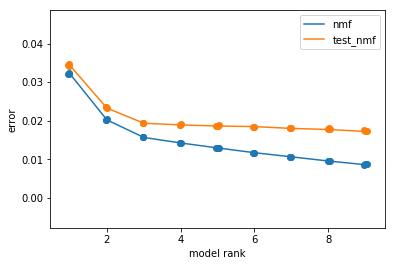

In [21]:
cellmat_rare = scnmf.build_matrix(df,['4139265.3','4139265.4','4139265.5','4222168.1'],first_sess = [5,5,5,3])
results_rare,fig_rare = scnmf.run_ensemble(cellmat_rare)


In [22]:
print(cellmat_rare.shape)

(28409, 45)


In [23]:
pca = sk.decomposition.PCA()
cm_rare = pca.fit_transform(cellmat_rare)

In [24]:
print(cm_rare.shape)

(28409, 45)


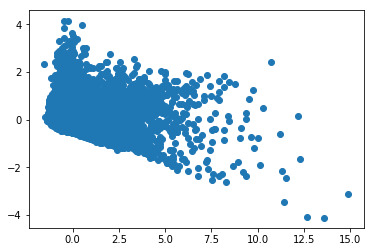

In [25]:
f,ax = plt.subplots()
ax.scatter(cm_rare[:,0],cm_rare[:,2])

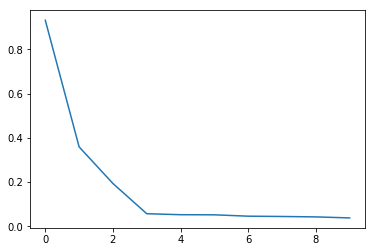

In [26]:
f,ax = plt.subplots()
ax.plot(pca.explained_variance_[:10])

In [27]:
fig_rare[0].savefig(os.path.join("G:\\My Drive\\manuscripts\\MightyMorphinPhotonRangers_manuscript\\Figures",'rare_cellnmf_rmse.pdf'),format='pdf')

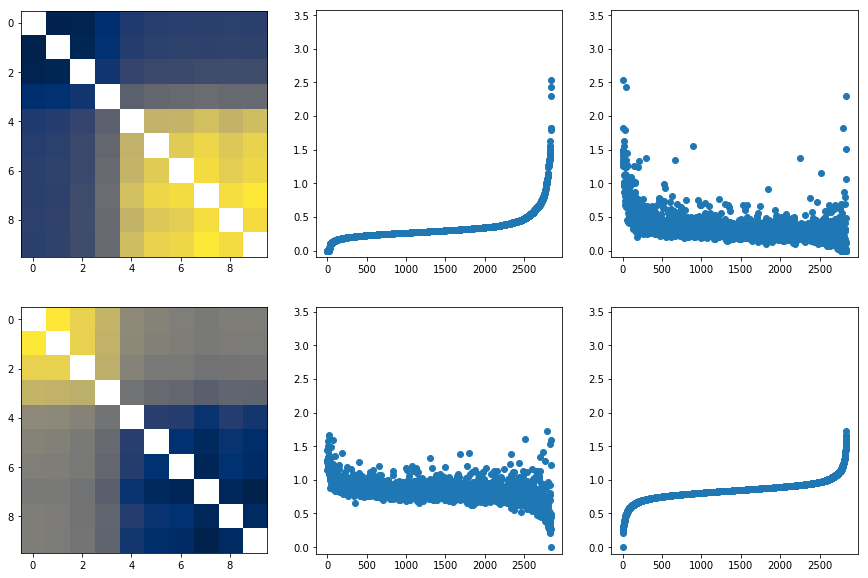

In [28]:
f_factors_rare,ax_factors_rare = scnmf.plot_factors(results_rare,2,10,downsample=.1)

In [29]:
f_factors_rare.savefig(os.path.join("G:\\My Drive\\manuscripts\\MightyMorphinPhotonRangers_Manuscript\\Figures",'rare_cellnmf_2factors.pdf'),format='pdf')

In [ ]:
W = results_rare[2]['factors'][0][0]
f,ax = plt.subplots()
ax.scatter(W[:,0],W[:,2])
f.savefig(os.path.join("G:\\My Drive\\manuscripts\\MightyMorphinPhotonRangers_Manuscript\\Figures",'rare_cellnmf_weights_scatter.pdf'),format='pdf')

4222153.2
num aberrant ttls 0.0
35248 (35248,) (35248, 21) 116195
(116195,) (116195, 21)


C:\Users\mplitt\Anaconda3\lib\site-packages\pandas\core\frame.py:4034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


frame diff 0
num aberrant ttls 0.0
33545 (33545,) (33545, 21) 121243
(121243,) (121243, 21)
frame diff 0
num aberrant ttls 0.0
38697 (38697,) (38697, 21) 129389
(129389,) (129389, 21)
frame diff 0
num aberrant ttls 0.0
37344 (37344,) (37344, 21) 121463
(121463,) (121463, 21)
frame diff 0
4222153.1
num aberrant ttls 0.0
36036 (36036,) (36036, 21) 118455
(118455,) (118455, 21)
frame diff 0
num aberrant ttls 0.0
33778 (33778,) (33778, 21) 111444
(111444,) (111444, 21)
frame diff 0
num aberrant ttls 0.0
35977 (35977,) (35977, 21) 118959
(118959,) (118959, 21)
frame diff 0
4222153.3
num aberrant ttls 0.0
22769 (22769,) (22769, 21) 72892
(72892,) (72892, 21)
frame diff 0
4222174.1
num aberrant ttls 0.0
29526 (29526,) (29526, 21) 83238
(83238,) (83238, 21)
frame diff 0
num aberrant ttls 0.0
34560 (34560,) (34560, 21) 97310
(97310,) (97310, 21)
frame diff 0
num aberrant ttls 0.0
30879 (30879,) (30879, 21) 86531
(86531,) (86531, 21)
frame diff 0
num aberrant ttls 0.0
28286 (28286,) (28286, 21) 

  0%|                                                                                            | 0/9 [00:00<?, ?it/s]

replicate 0
replicate 1
replicate 2


 11%|█████████▎                                                                          | 1/9 [00:28<03:48, 28.55s/it]

replicate 0
replicate 1
replicate 2


 22%|██████████████████▋                                                                 | 2/9 [02:41<06:58, 59.72s/it]

replicate 0
replicate 1
replicate 2


 33%|███████████████████████████▋                                                       | 3/9 [06:16<10:38, 106.44s/it]

replicate 0
replicate 1
replicate 2


 44%|████████████████████████████████████▉                                              | 4/9 [10:05<11:56, 143.27s/it]

replicate 0
replicate 1
replicate 2


 56%|██████████████████████████████████████████████                                     | 5/9 [14:56<12:30, 187.66s/it]

replicate 0
replicate 1
replicate 2


 67%|███████████████████████████████████████████████████████▎                           | 6/9 [19:37<10:46, 215.43s/it]

replicate 0
replicate 1
replicate 2


 78%|████████████████████████████████████████████████████████████████▌                  | 7/9 [24:56<08:12, 246.49s/it]

replicate 0
replicate 1
replicate 2


 89%|█████████████████████████████████████████████████████████████████████████▊         | 8/9 [30:43<04:36, 276.92s/it]

replicate 0
replicate 1
replicate 2


100%|███████████████████████████████████████████████████████████████████████████████████| 9/9 [37:26<00:00, 314.51s/it]


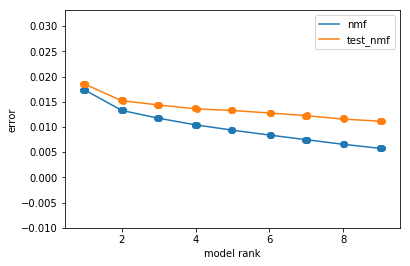

In [12]:

cellmat_fam = scnmf.build_matrix(df,['4222153.2','4222153.1','4222153.3','4222174.1'],first_sess=4)
results_fam,fig_fam = scnmf.run_ensemble(cellmat_fam)

In [62]:
fig_fam[0].savefig(os.path.join("G:\\My Drive\\manuscripts\\MightyMorphinPhotonRangers\\Figures",'fam_cellnmf_rmse.pdf'),format='pdf')

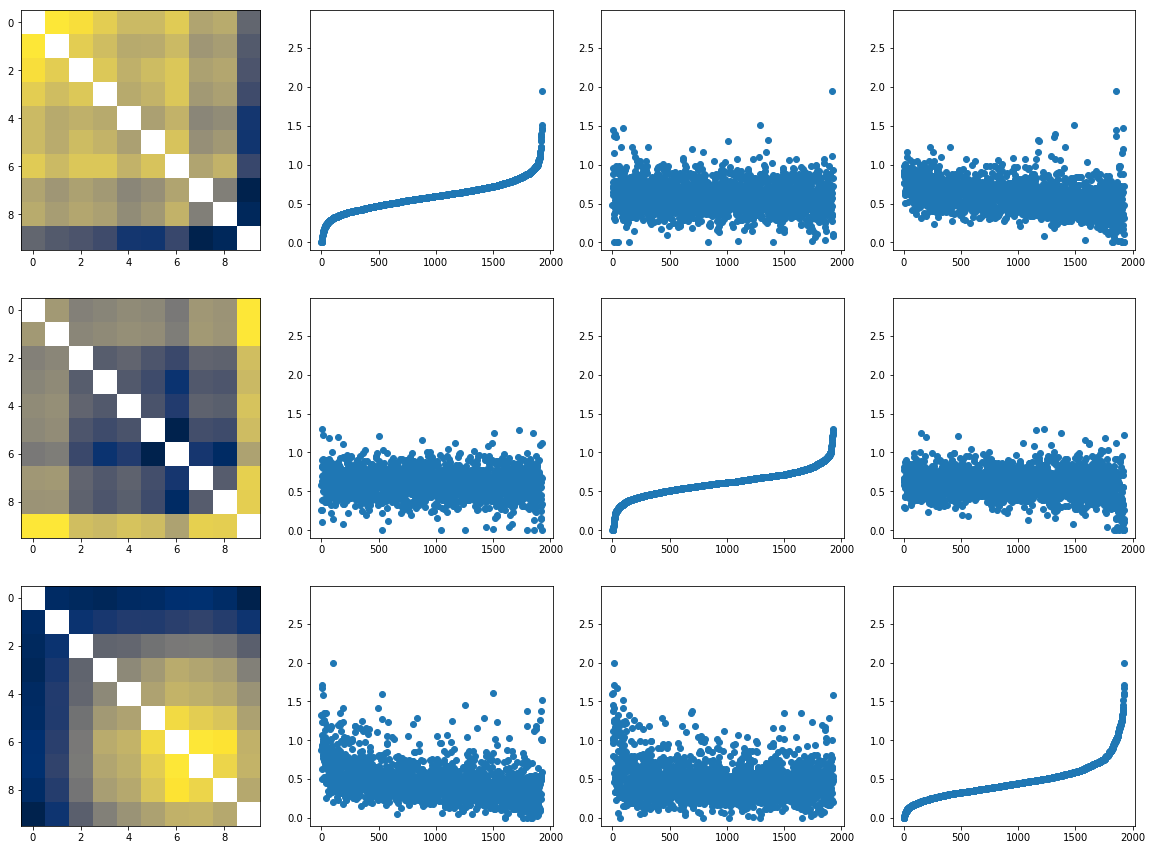

In [27]:
f_factors_fam,ax_factors_fam = scnmf.plot_factors(results_fam,3,10,downsample=.1)

In [25]:
f_factors_fam.savefig(os.path.join("G:\\My Drive\\manuscripts\\MightyMorphinPhotonRangers_Manuscript\\Figures",'fam_cellnmf_3factors.pdf'),format='pdf')

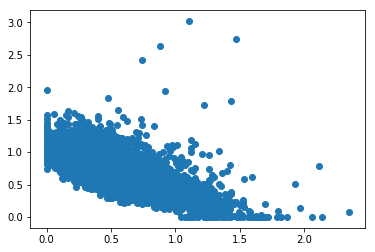

In [76]:
W = results_fam[2]['factors'][0][0]
f,ax = plt.subplots()
ax.scatter(W[:,0],W[:,1])
f.savefig(os.path.join("G:\\My Drive\\manuscripts\\MightyMorphinPhotonRangers\\Figures",'fam_cellnmf_weights_scatter.pdf'),format='pdf')